# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.express as px
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
# Ваш код здесь
display(data.describe())

fig1 = px.bar(data, y='Prod', title='Распределение целевого признака')

fig1.show()

fig2 = 0

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


In [4]:
# Пропуски 
data.isna().value_counts()

Well   Por    Perm   AI     Brittle  TOC    VR     Prod 
False  False  False  False  False    False  False  False    200
Name: count, dtype: int64

Распределение целевого признака вменяемое, пропусков в данных нет. Видимо, данные в уже предобработанном состоянии. Либо Василий очень ответственный.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Matrix rank: 7
Determinant: 0.0007477684988022732


,Por,Perm,AI,Brittle,TOC,VR,Prod
Por,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


,Por,Perm,AI,Brittle,TOC,VR,Prod
Por,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


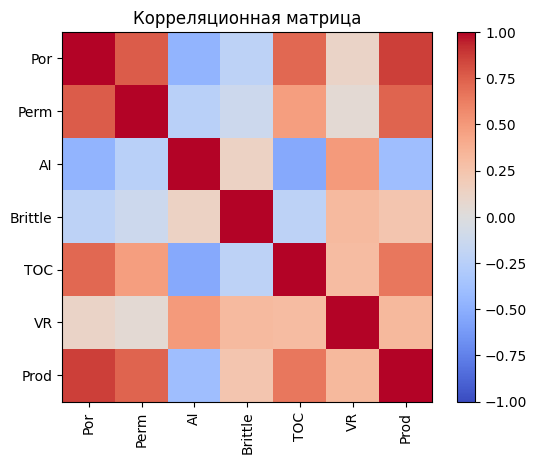

In [5]:
# Ваш код здесь
# Сразу удаляем признак индекса
data = data.drop('Well', axis=1)
x1 = np.corrcoef(data, rowvar=False)
print('Matrix rank:', np.linalg.matrix_rank(x1))
print('Determinant:', np.linalg.det(x1))

corr_matrix_pd = pd.DataFrame(x1, columns=data.columns, index=data.columns)
display(corr_matrix_pd)
#Для сравнения
display(data.corr())

#Визуализация
plt.imshow(corr_matrix_pd, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(data.columns)), labels=data.columns, rotation=90)
plt.yticks(range(len(data.columns)), labels=data.columns)
plt.title("Корреляционная матрица")
plt.show()

Признак Well сразу же выбросил, так как это он всего лишь носит информацию об индексе.

Сильная корреляция у целевого признака наблюдается с признаками TOC, Perm. Определитель близок к нулю, матрица плохо обусловлена.

Наблюдаются мультиколлинеарности у признаков Perm, Por. Также стоит присмотреться к паре TOC/Por, они тоже сильно скоррелированы. Из-за этого модель линейной регрессии прямо сейчас строить не рекомендуется, так как она будет нестабильна.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [6]:
# Ваш код здесь

X = data.drop('Prod', axis=1)
X_matrix = np.column_stack((np.ones(200), X))
y = data[['Prod']]

display(X, y)

X_cent = X - X.mean(axis=0)
X_st = X_cent/np.linalg.norm(X_cent, axis=0)
# display(X_st.describe().round(2))
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

w_hat_1 = np.linalg.lstsq(X_matrix, y, rcond=None)
w_hat_1_st = np.linalg.inv(X_st.T@X_st)@X_st.T@y_st
w_hat_2_st = np.linalg.lstsq(X_st, y_st, rcond=None)
print('Коэффициенты без стандартизации:')
print(np.round(w_hat_1[0]))
print('MAE без стандартизации:', np.round(np.sqrt(w_hat_1[1])))
print(w_hat_1_st.values)
print('')
print(w_hat_2_st[0])
print('MAE (стандартизированная):', np.sqrt(w_hat_2_st[1]))

,Por,Perm,AI,Brittle,TOC,VR
0,12.08,2.92,2.80,81.40,1.16,2.31
1,12.38,3.53,3.22,46.17,0.89,1.88
2,14.02,2.59,4.01,72.80,0.89,2.72
3,17.67,6.75,2.63,39.81,1.08,1.88
4,17.52,4.57,3.18,10.94,1.51,1.90
...,...,...,...,...,...,...
195,11.95,3.13,2.97,67.18,0.80,2.06
196,17.99,9.87,3.38,44.32,0.98,2.08
197,12.12,2.27,3.52,57.07,-0.04,1.73
198,15.55,4.48,2.48,58.25,1.89,2.35


,Prod
0,4165.196191
1,3561.146205
2,4284.348574
3,5098.680869
4,3406.132832
...,...
195,3847.571003
196,5601.227131
197,3409.575363
198,5087.592149


Коэффициенты без стандартизации:
[[-1230.]
 [  230.]
 [  116.]
 [ -364.]
 [   25.]
 [  -77.]
 [  783.]]
MAE без стандартизации: [2804.]
[[ 0.68974092]
 [ 0.20280704]
 [-0.20785148]
 [ 0.35602383]
 [-0.03759189]
 [ 0.2374949 ]]

[[ 0.68974092]
 [ 0.20280704]
 [-0.20785148]
 [ 0.35602383]
 [-0.03759189]
 [ 0.2374949 ]]
MAE (стандартизированная): [0.20039438]


Смысл высказывания "Выведите на экран полученные оценки коэффициентов модели, округлённые до целого" не понял. Что за оценки? Метрики модели? Если так, то вывел MAE.

Построение модели на нестандартизированных данных привело к получению различных коэффициентов. Интерпретация была невозможна. После стандартизации Имеем, что:
- Предпоследний признак (TOC) не информативен и не важен для модели, он околонулевой. То же и с признаком-индексом (Well), он ещё в 10 раз меньше вышеупомянутого, не зря его удалил ранее.
- Больше всего влияния на модель оказывают признаки Por и Brittle. Интерпретация признаков: при увеличении признака, коэффициент которого нам интересен, на 1, прогнозируемая величина увеличится на значение коэффициента (или уменьшится, в зависимости от знака последнего). Важно отметить, что это касается только нестандартизированных признаков. Например, если в условном персказании пористость увеличить на 1, то предсказанный ответ увеличится на 230. 

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [7]:
# Ваш код здесь

#Новые данные для предсказания
new_source = {'Por': 15.32, 'Perm': 3.71, 'AI': 3.29, 'Brittle': 55.99, 'TOC': 1.35, 'VR': 2.42}
#Истинный ответ
y_new = 4748.315024

new_array = np.array([[1, new_source['Por'], new_source['Perm'], new_source['AI'], new_source['Brittle'], new_source['TOC'], new_source['VR']]])
print(new_array)
new_pred = (new_array@w_hat_1[0]).item()  #Сразу преобразуем из скаляра
print('Prediction:', new_pred)
print('Абсолютная ошибка нового предсказания:', np.round(new_pred-y_new, 4))
print('Абсолютная ошибка нового предсказания (в процентах):', np.round((new_pred-y_new)/y_new*100, 2))

#Обучаем модель на всех данных (Не включая новую строчку)
prod_pred = pd.DataFrame((X_matrix@w_hat_1[0]), columns=['y'])
display(prod_pred)
print('Ошибка MAPE, %:', round(metrics.mean_absolute_percentage_error(y, prod_pred)*100, 4))
print('Ошибка R2:', round(metrics.r2_score(y, prod_pred), 4))

[[ 1.   15.32  3.71  3.29 55.99  1.35  2.42]]
Prediction: 4722.721538300552
Абсолютная ошибка нового предсказания: -25.5935
Абсолютная ошибка нового предсказания (в процентах): -0.54


,y
0,4626.701394
1,3417.424737
2,4722.042751
3,5050.856330
4,3823.592091
...,...
195,4035.963420
196,5491.496527
197,3328.981438
198,5119.664904


Ошибка MAPE, %: 3.6295
Ошибка R2: 0.9598


Разница предсказаний в абсолютных значениях по модулю 25.5935. Или около половины процента. Много ли это? Как по мне, нет.

! Для подсчёта метрик использовался модуль metrics из sklearn. Не вижу смысла городить сложные функции здесь, если они есть там, тем более, в задании это не обговорено. Использовать буду R2 и MAPE, помимо MSE, его я не считаю и буду использовать не везде.

После обучения модели на полученных ранее коэффициентах, можно сделать вывод, что модель получилась отличная, учитывая, что условия тепличные - проверочного набора данных нет. С новыми записями в данных модель тоже справляется. Но желательно всё же провести тестирование хотя бы на десятке новых строк данных.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [8]:
# Ваш код здесь

display(corr_matrix_pd)
print(np.round(w_hat_1[0]))

,Por,Perm,AI,Brittle,TOC,VR,Prod
Por,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


[[-1230.]
 [  230.]
 [  116.]
 [ -364.]
 [   25.]
 [  -77.]
 [  783.]]


Если я правильно понимаю, то порядок, в котором я подавал данные и порядок, в котором они вышли, одинаковый, и коэффициенты с признаками расставлены соответственно. Тогда, сразу наблюдаем странность: противоречие prod и TOC в корреляционной матрице и в виде коэффициента. В первом случае их отношение прямое, во втором - обратное. Предполагаю, что это и есть та самая мультиколлинеарность. А может даже та скрытая, о которой упоминалось в модуле. Но пока не рассказывалось, как её конкретно обнаружить и уничтожить.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [9]:
# Ваш код здесь
# Приготовим выборку и посмотрим на ранг и определитель матрицы
data_clean = data.drop(['TOC', 'Perm'], axis=1)
columns_left = ['Por', 'AI', 'Brittle', 'VR', 'Prod']
x2 = np.corrcoef(data_clean, rowvar=False)
print('Matrix rank:', np.linalg.matrix_rank(x2))
print('Determinant:', np.linalg.det(x2))
corr_matrix_pd_cleaned = pd.DataFrame(x2, columns=columns_left, index=columns_left)
display(corr_matrix_pd_cleaned)

# Подготовка коэффициентов
X_clean = data_clean.drop('Prod', axis=1)
X_matrix_clean = np.column_stack((np.ones(200), X_clean))
w_hat_clean = np.linalg.lstsq(X_matrix_clean, y, rcond=None)
print(np.round(w_hat_clean[0]))
X_cent_cleaned = X_clean - X_clean.mean(axis=0)
X_st_cleaned = X_cent_cleaned/np.linalg.norm(X_cent_cleaned, axis=0)
w_hat_st_clean = np.linalg.lstsq(X_st_cleaned, y_st, rcond=None)
print('-'*20)
print(w_hat_st_clean[0])

# Делаем предсказание на всех данных (Не включая новую строчку)
prod_pred = pd.DataFrame((X_matrix_clean@w_hat_clean[0]), columns=['y_pred_cleaned'])
display(prod_pred)
print('Ошибка MAPE, %:', round(metrics.mean_absolute_percentage_error(y, prod_pred)*100, 4))
print('Ошибка R2:', round(metrics.r2_score(y, prod_pred), 4))

Matrix rank: 5
Determinant: 0.020180673433452253


,Por,AI,Brittle,VR,Prod
Por,1.000000,-0.461549,-0.218570,0.111860,0.861910
AI,-0.461549,1.000000,0.127599,0.499143,-0.390835
Brittle,-0.218570,0.127599,1.000000,0.317929,0.237155
VR,0.111860,0.499143,0.317929,1.000000,0.323182
Prod,0.861910,-0.390835,0.237155,0.323182,1.000000


[[-1835.]
 [  293.]
 [ -200.]
 [   28.]
 [  517.]]
--------------------
[[ 0.87764988]
 [-0.11430463]
 [ 0.39368638]
 [ 0.15689796]]


,y_pred_cleaned
0,4589.521072
1,3397.143992
2,4890.396657
3,4889.527323
4,3947.907786
...,...
195,3995.015658
196,5061.417112
197,3484.621590
198,5051.174110


Ошибка MAPE, %: 4.0441
Ошибка R2: 0.9452


После удаления признаков, сильно скоррелированных друг с другом, а также Well, который не нёс в себе пользы и был слабо скоррелирован с целевым признаком, первое, что бросается в глаза - увеличился определитель матрицы с данными, а также сами коэффициенты изменились. Немного настораживает, правда, увеличение свободного коэффициента. Ожидаемо уменьшилась точность предсказаний, исходя из метрик, но сами по себе значения как будто бы стали ближе к реальным, уменьшился разброс между предсказаниями.

Также ожидаемо изменились стандартизированные показатели коэффициентов, так как признаков стало меньше, масштаб стал немного другой, и вклад каждого признака тоже. Но Por и Brittle всё также вносят больше всего влияния в модель. Por немного в абсолютном значении как коэффициент увеличился, теперь при увеличении последнего на 1, целевой признак увеличится на 293 вместо 230 ранее. То же самое и с Brittle - 28 против 25 ранее. При этом остальные признаки уменьшились, как и их влияние на модель.

В то же время, противоречий я больше не вижу - признак, который вызывал их больше всего, был удалён.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [10]:
# Ваш код здесь
# Обучаем модель
linear_model = LinearRegression()
linear_model.fit(X_clean, y)
print('Коэффициенты линейной регресии:', np.round(linear_model.coef_))

# Прогноз
linear_model_pred = linear_model.predict(X_clean)
print('Ошибка MAPE, %:', round(metrics.mean_absolute_percentage_error(y, linear_model_pred)*100, 4))
print('Ошибка R2:', round(metrics.r2_score(y, linear_model_pred), 4))

Коэффициенты линейной регресии: [[ 293. -200.   28.  517.]]
Ошибка MAPE, %: 4.0441
Ошибка R2: 0.9452


По итогу библиотечная реализация по результатам ничем не отличается от ручной (с помощью numpy). Сошлись как коэффициенты, так и метрики. При этом, если в настройках модели поставить fit_intercept=False, как где-то было в модуле, качество модели упадёт на процент по метрике MAPE, и коэффициенты станут другими. На первый взгляд, из-за этого параметра модель получит коэффициенты, близкие к тем, которые были до чистки.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [ ]:
# Импорты
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_validate
import optuna
from sklearn.model_selection import cross_val_score

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# разделение данных для обучения
X = data[columns_left].drop('Prod', axis=1)
y = data['Prod']

#Стандартизация и полиномизация признаков
scaler = StandardScaler()
poly = PolynomialFeatures(degree=3, include_bias=False)
X_stscaled = scaler.fit_transform(X)
X_stscaled_poly = poly.fit_transform(X_stscaled)
print('Полиномиальных признаков:', X_stscaled_poly.shape[1])

#Обучение модели на подготовленных данных
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_stscaled_poly, y)
cv_results_1 = cross_validate(
    linear_model_poly,
    X_stscaled_poly, 
    y, 
    scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'r2'], 
    cv=5, 
    return_train_score=True
    )

print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_1['train_neg_mean_absolute_percentage_error'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_1['test_neg_mean_absolute_percentage_error'].mean() * 100))
print('-'*40)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_1['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_1['test_neg_mean_absolute_error'].mean()))
print('-'*40)
print('R2 на тренировочных фолдах: {:.2f}'.format(-cv_results_1['train_r2'].mean()))
print('R2 на валидационных фолдах: {:.2f}'.format(-cv_results_1['test_r2'].mean()))

,Por,AI,Brittle,VR
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90
...,...,...,...,...
195,11.95,2.97,67.18,2.06
196,17.99,3.38,44.32,2.08
197,12.12,3.52,57.07,1.73
198,15.55,2.48,58.25,2.35


Полиномиальных признаков: 34
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %
----------------------------------------
MAE на тренировочных фолдах: 75.35
MAE на валидационных фолдах: 110.47
----------------------------------------
R2 на тренировочных фолдах: -0.99
R2 на валидационных фолдах: -0.97


Напомню, до этого метрика MAPE на тренировочной выборке была около 4%, теперь же даже валидационная выборка показывает метрику лучше, при этом тренировочная значительно уменьшила свою ошибку в среднем.

Метрика R2, к слову, отрицательна. Нейросети говорят, что это плохо, на глаза переобучение или ошибка при стандартизации. Ещё говорят, что в таком случае необходима регуляризация. Думаю, поможет ли она или нет, мы выясним далее.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
%%time
# Ваш код здесь
# Функция для подбора гиперпараметров
def optuna_Lasso(trial, cv=5, X=X_stscaled_poly, y=y):
    #Пространства параметров:
    alpha = trial.suggest_float('alpha', 0.1, 30, step=0.1)
    #Обучение и оценка модели
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_stscaled_poly, y)
    score = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1).mean()
    return score

# cоздаем объект исследования
# Логистическая регрессия с набором параметров 1
study_Lasso = optuna.create_study(study_name="Lasso reg", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_Lasso.optimize(optuna_Lasso, n_trials=50)

print('-'*20)
print("Наилучшие значения гиперпараметров {}".format(study_Lasso.best_params))
#Обучение модели на лучших найденных параметрах
model_Lasso_best = Lasso(**study_Lasso.best_params, random_state=42, max_iter=10000)
model_Lasso_best.fit(X_stscaled_poly, y)
cv_results_2 = cross_validate(
    model_Lasso_best,
    X_stscaled_poly, 
    y,
    scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'r2'], 
    cv=5, 
    return_train_score=True
    )

print('-'*50)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_2['train_neg_mean_absolute_percentage_error'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_2['test_neg_mean_absolute_percentage_error'].mean() * 100))
print('-'*40)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_2['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_2['test_neg_mean_absolute_error'].mean()))
print('-'*40)
print('R2 на тренировочных фолдах: {:.2f}'.format(-cv_results_2['train_r2'].mean()))
print('R2 на валидационных фолдах: {:.2f}'.format(-cv_results_2['test_r2'].mean()))

#Визуализируем оптимизацию
optuna.visualization.plot_optimization_history(study_Lasso, target_name="MAPE")

[I 2025-05-11 12:20:32,526] A new study created in memory with name: Lasso reg
[I 2025-05-11 12:20:33,725] Trial 0 finished with value: -0.022781185425593188 and parameters: {'alpha': 4.3999999999999995}. Best is trial 0 with value: -0.022781185425593188.
[I 2025-05-11 12:20:34,474] Trial 1 finished with value: -0.029399279662130417 and parameters: {'alpha': 29.000000000000004}. Best is trial 0 with value: -0.022781185425593188.
[I 2025-05-11 12:20:35,202] Trial 2 finished with value: -0.027638536064997738 and parameters: {'alpha': 25.500000000000004}. Best is trial 0 with value: -0.022781185425593188.
[I 2025-05-11 12:20:35,879] Trial 3 finished with value: -0.02417801518186464 and parameters: {'alpha': 1.7000000000000002}. Best is trial 0 with value: -0.022781185425593188.
[I 2025-05-11 12:20:35,892] Trial 4 finished with value: -0.024124990986435085 and parameters: {'alpha': 11.0}. Best is trial 0 with value: -0.022781185425593188.
[I 2025-05-11 12:20:35,905] Trial 5 finished with v

--------------------
Наилучшие значения гиперпараметров {'alpha': 4.6}
--------------------------------------------------
MAPE на тренировочных фолдах: 1.82 %
MAPE на валидационных фолдах: 2.28 %
----------------------------------------
MAE на тренировочных фолдах: 78.01
MAE на валидационных фолдах: 95.66
----------------------------------------
R2 на тренировочных фолдах: -0.99
R2 на валидационных фолдах: -0.98
CPU times: total: 703 ms
Wall time: 4.38 s


По итогу после регуляризации Lasso значения метрик удалось ещё немного улучшить. Но отрицательный R2 всё ещё с нами, хотя с виду он тоже неплох, если бы имел положительный знак, вообще было бы отлично. Но есть у меня сомнения, что знак как будто бы сам становится противоположным, иначе к чему бы эти 'neg' в начале метрик...

In [14]:
# Для проверки
from sklearn.metrics import r2_score
y_pred = model_Lasso_best.predict(X_stscaled_poly)
print("R2 вручную:", np.round(r2_score(y, y_pred), 2))

R2 вручную: 0.99


А теперь вот всё нормально. Странно это всё. Хотелось бы пояснения, почему там отрицательно, а тут всё отлично получилось. Нейронка внятно объяснить не смогла, всё также говорит, что есть проблема, и то, что получилось, парадокс.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [ ]:
# Ваш код здесь
# Функция для подбора гиперпараметров
def optuna_Ridge(trial, cv=5, X=X_stscaled_poly, y=y):
    #Пространства параметров:
    alpha = trial.suggest_float('alpha', 0, 1, step=0.02)
    #Обучение и оценка модели
    model = Ridge(alpha=alpha, max_iter=10000)
    model.fit(X_stscaled_poly, y)
    score = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1).mean()
    return score

# cоздаем объект исследования
study_Ridge = optuna.create_study(study_name="Ridge reg", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_Ridge.optimize(optuna_Ridge, n_trials=50)

print('-'*20)
print("Наилучшие значения гиперпараметров {}".format(study_Ridge.best_params))
#Обучение модели на лучших найденных параметрах
model_Ridge_best = Ridge(**study_Ridge.best_params, random_state=42, max_iter=10000)
model_Ridge_best.fit(X_stscaled_poly, y)
cv_results_3 = cross_validate(
    model_Ridge_best,
    X_stscaled_poly, 
    y,
    scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'r2'], 
    cv=5, 
    return_train_score=True
    )

print('-'*50)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_3['train_neg_mean_absolute_percentage_error'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_3['test_neg_mean_absolute_percentage_error'].mean() * 100))
print('-'*40)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_3['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_3['test_neg_mean_absolute_error'].mean()))
print('-'*40)
print('R2 на тренировочных фолдах: {:.2f}'.format(-cv_results_3['train_r2'].mean()))
print('R2 на валидационных фолдах: {:.2f}'.format(-cv_results_3['test_r2'].mean()))

#Визуализируем оптимизацию
optuna.visualization.plot_optimization_history(study_Ridge, target_name="MAPE")

[I 2025-05-11 12:20:36,921] A new study created in memory with name: Ridge reg
[I 2025-05-11 12:20:36,939] Trial 0 finished with value: -0.02710703869449064 and parameters: {'alpha': 0.92}. Best is trial 0 with value: -0.02710703869449064.
[I 2025-05-11 12:20:36,951] Trial 1 finished with value: -0.026728644558268216 and parameters: {'alpha': 0.1}. Best is trial 1 with value: -0.026728644558268216.
[I 2025-05-11 12:20:36,964] Trial 2 finished with value: -0.02672074759991778 and parameters: {'alpha': 0.16}. Best is trial 2 with value: -0.02672074759991778.
[I 2025-05-11 12:20:36,976] Trial 3 finished with value: -0.026916554046699993 and parameters: {'alpha': 0.64}. Best is trial 2 with value: -0.02672074759991778.
[I 2025-05-11 12:20:36,989] Trial 4 finished with value: -0.026739810229221443 and parameters: {'alpha': 0.28}. Best is trial 2 with value: -0.02672074759991778.
[I 2025-05-11 12:20:37,002] Trial 5 finished with value: -0.026769978629310416 and parameters: {'alpha': 0.36}. B

--------------------
Наилучшие значения гиперпараметров {'alpha': 0.16}
--------------------------------------------------
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.67 %
----------------------------------------
MAE на тренировочных фолдах: 75.37
MAE на валидационных фолдах: 110.08
----------------------------------------
R2 на тренировочных фолдах: -0.99
R2 на валидационных фолдах: -0.98


И снова отрицательная R2. Чтож, больше не обращаю на неё внимания, считаю, что взял её по модулю. L2 регуляризация показывает себя хуже предыдущей. Да, всё ёще лучше, чем без неё. Идём дальше.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
# Функция для подбора гиперпараметров
def optuna_ElNet(trial, cv=5, X=X_stscaled_poly, y=y):
    #Пространства параметров:
    alpha = trial.suggest_float('alpha', 0.1, 5, step=0.1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 1, step=0.05)
    #Обучение и оценка модели
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    model.fit(X_stscaled_poly, y)
    score = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_percentage_error", n_jobs=-1).mean()
    return score

# cоздаем объект исследования
study_ElNet = optuna.create_study(study_name="ElasticNet reg", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_ElNet.optimize(optuna_ElNet, n_trials=50)

print('-'*20)
print("Наилучшие значения гиперпараметров {}".format(study_ElNet.best_params))
#Обучение модели на лучших найденных параметрах
model_ElNet_best = ElasticNet(**study_ElNet.best_params, random_state=42, max_iter=10000)
model_ElNet_best.fit(X_stscaled_poly, y)
cv_results_4 = cross_validate(
    model_ElNet_best,
    X_stscaled_poly, 
    y,
    scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'r2'], 
    cv=5, 
    return_train_score=True
    )

print('-'*50)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results_4['train_neg_mean_absolute_percentage_error'].mean() * 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results_4['test_neg_mean_absolute_percentage_error'].mean() * 100))
print('-'*40)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_4['train_neg_mean_absolute_error'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_4['test_neg_mean_absolute_error'].mean()))
print('-'*40)
print('R2 на тренировочных фолдах: {:.2f}'.format(-cv_results_4['train_r2'].mean()))
print('R2 на валидационных фолдах: {:.2f}'.format(-cv_results_4['test_r2'].mean()))

#Визуализируем оптимизацию
optuna.visualization.plot_optimization_history(study_ElNet, target_name="MAPE")

[I 2025-05-11 12:20:37,676] A new study created in memory with name: ElasticNet reg
[I 2025-05-11 12:20:37,690] Trial 0 finished with value: -0.11509387073968538 and parameters: {'alpha': 4.7, 'l1_ratio': 0.2}. Best is trial 0 with value: -0.11509387073968538.
[I 2025-05-11 12:20:37,703] Trial 1 finished with value: -0.09634000350104381 and parameters: {'alpha': 1.7000000000000002, 'l1_ratio': 0.15000000000000002}. Best is trial 1 with value: -0.09634000350104381.
[I 2025-05-11 12:20:37,716] Trial 2 finished with value: -0.07696755765258315 and parameters: {'alpha': 3.7, 'l1_ratio': 0.85}. Best is trial 2 with value: -0.07696755765258315.
[I 2025-05-11 12:20:37,729] Trial 3 finished with value: -0.0855755293747931 and parameters: {'alpha': 2.8000000000000003, 'l1_ratio': 0.7000000000000001}. Best is trial 2 with value: -0.07696755765258315.
[I 2025-05-11 12:20:37,742] Trial 4 finished with value: -0.11359400877573286 and parameters: {'alpha': 4.1, 'l1_ratio': 0.15000000000000002}. Best

--------------------
Наилучшие значения гиперпараметров {'alpha': 2.3000000000000003, 'l1_ratio': 1.0}
--------------------------------------------------
MAPE на тренировочных фолдах: 1.80 %
MAPE на валидационных фолдах: 2.37 %
----------------------------------------
MAE на тренировочных фолдах: 76.78
MAE на валидационных фолдах: 98.79
----------------------------------------
R2 на тренировочных фолдах: -0.99
R2 на валидационных фолдах: -0.98


Ну, плюс-минус получилось среднее значение из двух регуляризаций. При этом ElasticNet решил, что l1 в данном случае важнее, что сходится с моим мнением. Точность чуть хуже, чем у чистого l1, при этом лучше, чем у чистого l2.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
# Ваш код здесь
models_list = ['Стандартная регрессионная модель', 'Полиномиальная модель', 'Полиномиальная модель с регуляризацией l1', 'Полиномиальная модель с регуляризацией l2', 'Полиномиальная модель с регуляризацией ElasticNet']

#Создание датафрейма
pd.DataFrame(
    {'Наименование модели': models_list, 
     'Гиперпараметры': ['-', '-', study_Lasso.best_params, study_Ridge.best_params, study_ElNet.best_params],
     'Использование полиномов': ['Нет', 'Да', 'Да', 'Да', 'Да'],
     'Ошибка модели в % на тренировочной выборке': [
         round(metrics.mean_absolute_percentage_error(y, linear_model_pred)*100, 3),
         round(-cv_results_1['train_neg_mean_absolute_percentage_error'].mean() * 100, 3),
         round(-cv_results_2['train_neg_mean_absolute_percentage_error'].mean() * 100, 3), 
         round(-cv_results_3['train_neg_mean_absolute_percentage_error'].mean() * 100, 3),
         round(-cv_results_4['train_neg_mean_absolute_percentage_error'].mean() * 100, 3)
         ],
     'Ошибка модели в % на валидационной выборке': [
         '-',
         round(-cv_results_1['test_neg_mean_absolute_percentage_error'].mean() * 100, 3),
         round(-cv_results_2['test_neg_mean_absolute_percentage_error'].mean() * 100, 3), 
         round(-cv_results_3['test_neg_mean_absolute_percentage_error'].mean() * 100, 3),
         round(-cv_results_4['test_neg_mean_absolute_percentage_error'].mean() * 100, 3)
         ],
    }
)

,Наименование модели,Гиперпараметры,Использование полиномов,Ошибка модели в % на тренировочной выборке,Ошибка модели в % на валидационной выборке
0,Стандартная регрессионная модель,-,Нет,4.044,-
1,Полиномиальная модель,-,Да,1.773,2.681
2,Полиномиальная модель с регуляризацией l1,{'alpha': 4.6},Да,1.821,2.276
3,Полиномиальная модель с регуляризацией l2,{'alpha': 0.16},Да,1.773,2.672
4,Полиномиальная модель с регуляризацией ElasticNet,"{'alpha': 2.3000000000000003, 'l1_ratio': 1.0}",Да,1.797,2.368


### <center> **Вывод**

В итоговую таблицу решил записать 5 моделей - 4 с полиномными признаками, и одну стандартную. Остальные изученные здесь смысла включать не вижу. Ошибку стандартной модели решил также отдельно от задания не вычислять (в задании о валидационной выборке ни слова), так как если даже ошибка на тренировочной выборке сильно выше по сравнению с другими моделями, то она же на валидационной выборке будет ещё выше из-за переобучения.

Победитель - модель с полиномиальными признаками и регуляризацией l1. Она показывает наилучшую точность предсказаний на валидационной выборке (и на тренировочной обычно тоже, зависит от прогона) ElasticNet иногда показывает схожие результаты, но иногда, играясь с коэффициентами, обычно она несколько хуже. Но один факт остаётся всегда неизменным - ElasticNet всегда "выключает" влияние l2 регуляризации, в то же время модель с чистой l2 регуляризацией показывает результат несколько хуже. Это что касается ошибки на валидационной выборке. Тренировочную не рассматриваем.

По переобучению - все модели показывают себя на примерно одинаковом уровне по ошибке на тренировочной выборе, на валидационной выборке уже есть различия, небольшие. Но как уже говорилось ранее - лучшая метрика у модели с регуляризацией l1, и ElasticNet, если она подбирает схожую alpha. Поэтому можно сказать, что и переобучение у них наименьшее. 

Про базовую модель смысла говорить нет - она даже на тренировочной выборке показывает относительно низкие метрики, что скорее всего вызвано недостатком наблюдений в выборке.